In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from collections import Counter
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import warnings
warnings.filterwarnings("ignore")

In [133]:
df=pd.read_csv('https://raw.githubusercontent.com/arjun0200/Datasets/main/Reviews.csv')
df.head(2)

,Unnamed: 0,Ratings,Review,Product
0,0,4,A bit expensive when we compare with today's i...,Laptop
1,1,5,Fantastic value for money machine!! Absolute b...,Laptop


In [134]:
df.shape

(30450, 4)

There are 30450 rows and 4 columns present in the dataset

In [135]:
df.keys()

Index(['Unnamed: 0', 'Ratings', 'Review', 'Product'], dtype='object')

### Feature Engineering

In [136]:
#removing unwanted column-unnamed
df.drop('Unnamed: 0', axis =1, inplace = True)

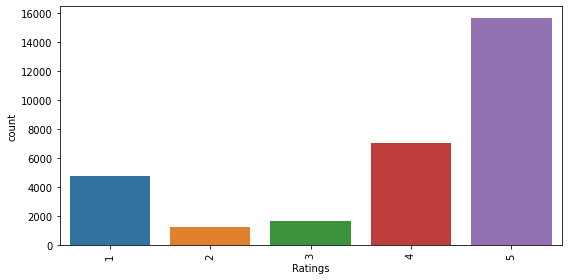

In [137]:
def countplot(x):
    plt.figure(figsize=(8,4))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

countplot(df['Ratings'])

Given dataset is unbalanced

In [138]:
#analysing length of reviews
df['length']=df.Review.str.len()
df.head()

,Ratings,Review,Product,length
0,4,A bit expensive when we compare with today's i...,Laptop,498
1,5,Fantastic value for money machine!! Absolute b...,Laptop,499
2,5,"The best you can get, looks and performance bo...",Laptop,334
3,5,"Ultimate machine, best laptop I have ever used...",Laptop,183
4,5,"For everyone, who is planning to buy MBA M1- ...",Laptop,500


<AxesSubplot:xlabel='Ratings', ylabel='length'>

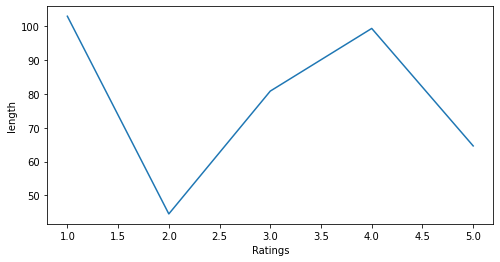

In [139]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.lineplot(x='Ratings', y='length', data=df, ci=None)

Length of the rating is highest for 4 and lowest for 2

### Data Preprocessing

In [140]:
df.duplicated().sum()

13127

In [141]:
df.drop_duplicates(inplace = True)

In [142]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase


In [143]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
stop_words = stopwords.words("english")

In [145]:
lemmatizer = WordNetLemmatizer()

In [146]:
from tqdm import tqdm
Preprocessed_Reviews = []

#tqdm is for printing the status bar
for sentence in tqdm(df['Review'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    Preprocessed_Reviews.append(sentence.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 17323/17323 [00:01<00:00, 9200.41it/s]


In [147]:
df['Preprocessed_Reviews'] = Preprocessed_Reviews
df

,Ratings,Review,Product,length,Preprocessed_Reviews
0,4,A bit expensive when we compare with today's i...,Laptop,498,a bit expensive compare today intel th gen amd...
1,5,Fantastic value for money machine!! Absolute b...,Laptop,499,fantastic value money machine absolute beast f...
2,5,"The best you can get, looks and performance bo...",Laptop,334,the best get look performance notch supreme ba...
3,5,"Ultimate machine, best laptop I have ever used...",Laptop,183,ultimate machine best laptop i ever used hand ...
4,5,"For everyone, who is planning to buy MBA M1- ...",Laptop,500,for everyone planning buy mba m pros blazing f...
...,...,...,...,...,...
30445,5,It's a good one ..I have been using it for a y...,routers,98,it good one i using year nw quite good range a...
30446,5,Nice router at the cheapest price. Work perfec...,routers,77,nice router cheapest price work perfectly rang...
30447,5,Such a great product works perfectly and very ...,routers,104,such great product work perfectly fast work fl...
30448,5,I have been using tp - 300 N from 5 years. Sti...,routers,251,i using tp n year still work well not single c...


In [148]:
#analysing length of reviews
df['Preprocessed_length']=df.Preprocessed_Reviews.str.len()
df.head()

,Ratings,Review,Product,length,Preprocessed_Reviews,Preprocessed_length
0,4,A bit expensive when we compare with today's i...,Laptop,498,a bit expensive compare today intel th gen amd...,306
1,5,Fantastic value for money machine!! Absolute b...,Laptop,499,fantastic value money machine absolute beast f...,345
2,5,"The best you can get, looks and performance bo...",Laptop,334,the best get look performance notch supreme ba...,201
3,5,"Ultimate machine, best laptop I have ever used...",Laptop,183,ultimate machine best laptop i ever used hand ...,139
4,5,"For everyone, who is planning to buy MBA M1- ...",Laptop,500,for everyone planning buy mba m pros blazing f...,351


In [149]:
# Total length removal
print ('Original Length', df.length.sum())
print ('Clean Length', df.Preprocessed_length.sum())

Original Length 1548534
Clean Length 1100744


### EDA

<AxesSubplot:xlabel='Preprocessed_length', ylabel='Density'>

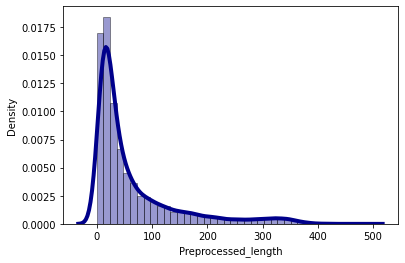

In [150]:
#Density plot and histogram of all character count
sns.distplot(df['Preprocessed_length'],hist=True,kde=True,
              bins= 40,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

   Review_AWL                               Preprocessed_Reviews
0    5.265306  a bit expensive compare today intel th gen amd...
1    5.920000  fantastic value money machine absolute beast f...
2    5.516129  the best get look performance notch supreme ba...


<AxesSubplot:xlabel='Review_AWL', ylabel='Density'>

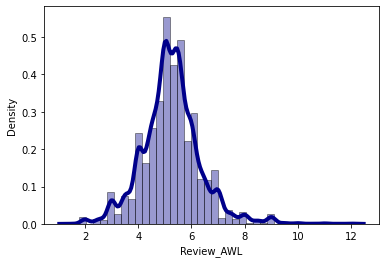

In [168]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))

df['Review_AWL']=df['Preprocessed_Reviews'].apply(lambda x: avg_word(x))
print(df[['Review_AWL','Preprocessed_Reviews']].head(3))


#Density plot and histogram of average word length
sns.distplot(df['Review_AWL'],hist=True,kde=True,
              bins = 40 ,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

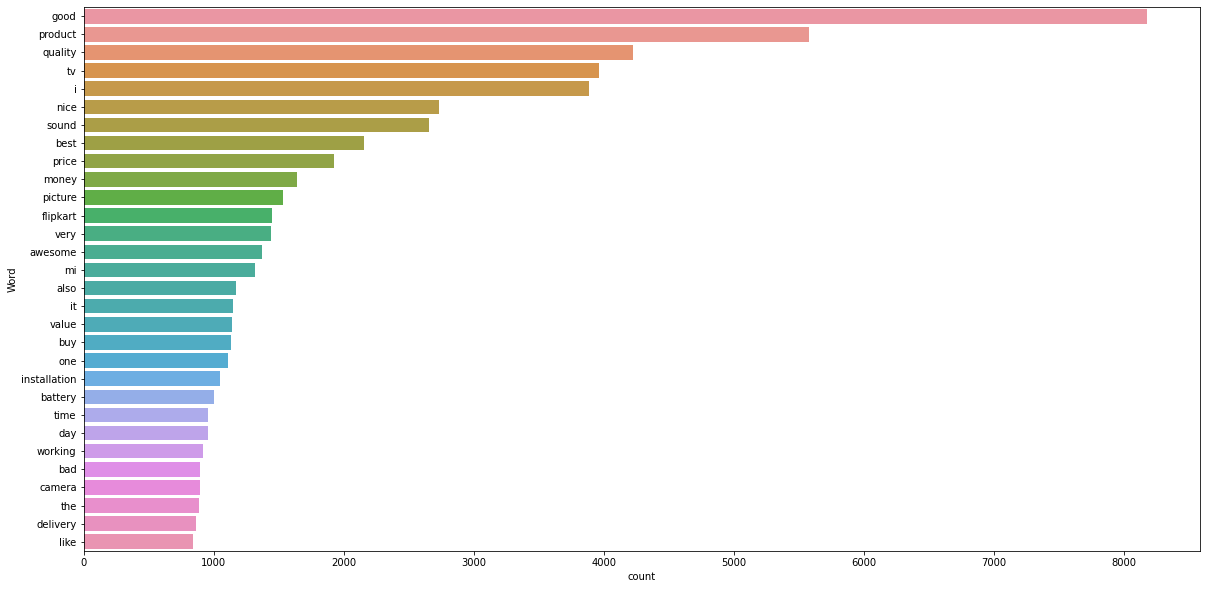

None


In [156]:
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Preprocessed_Reviews']))

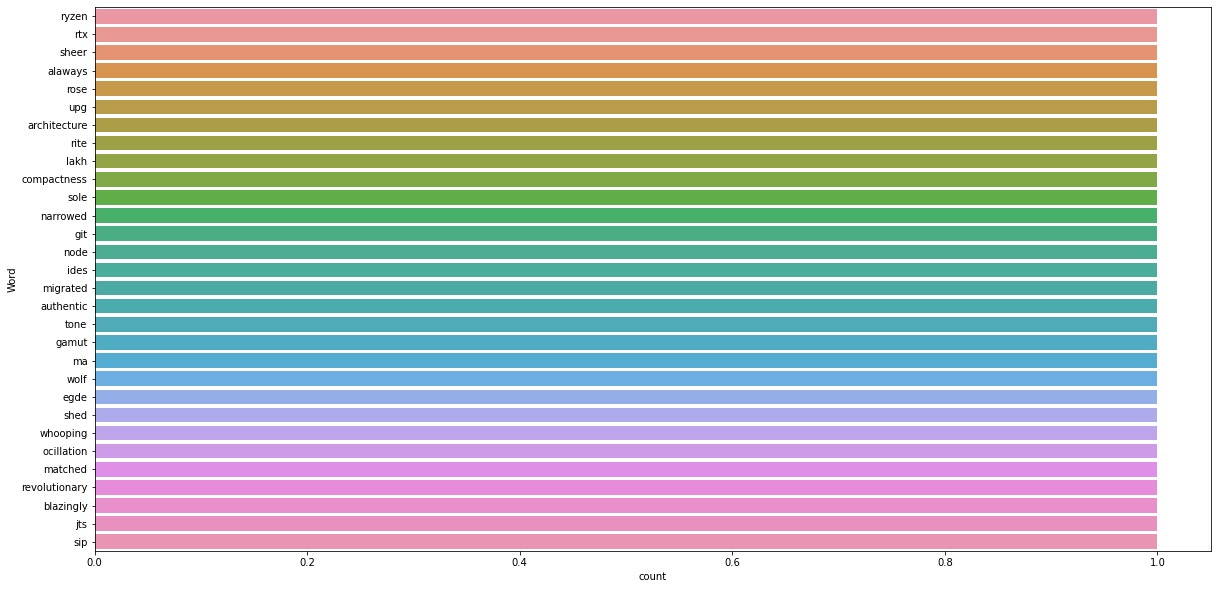

None


In [158]:
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)  
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 least words
    d=words_df.nsmallest(columns='count',n=terms)   #same as frequest other than the nsmallest
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Preprocessed_Reviews']))

### Feature Extraction

In [338]:
# #TF-Term frequency
# df_tf=(df['Preprocessed_Reviews'][0:1].apply(lambda x: pd.value_counts(x.split(" ")))).sum(axis=0).reset_index()
# df_tf.columns=['words','tf']


# #IDF-inverse document frequency
# for i,word in enumerate(df_tf['words']):
#     df_tf.loc[i,'idf']=np.log(df_tf.shape[0]/len(df[df['Preprocessed_Reviews'].str.contains(word)]))
    
    
# #tf-idf
# df_tf['tfidf']=df_tf['tf']*df_tf['idf']
# df_tf[:2]

<AxesSubplot:>

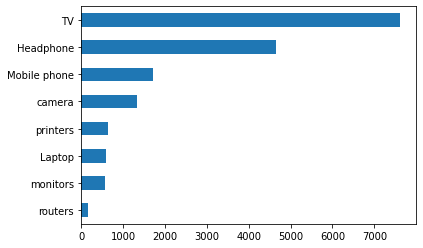

In [178]:
#products whose reviews are taken
df['Product'].value_counts().sort_values().plot(kind='barh')

The highest reviews are of TV and lowest is for routers

<AxesSubplot:xlabel='count', ylabel='Product'>

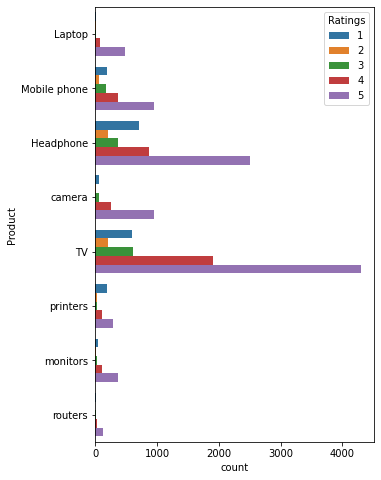

In [182]:
plt.figure(figsize = (5,8))
sns.countplot(y=df['Product'],hue=df['Ratings'])

Above graph shows ratings of the products

In [183]:
from wordcloud import WordCloud, STOPWORDS 
stopwords= set(STOPWORDS) 

def show_wordcloud(data, title =None): 
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40,
                          scale=3, random_state=1).generate(str(data))
                                                                                                                                        
    fig= plt.figure(1,figsize=(15,15)) 
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

Word cloud for Preprocessed_Reviews


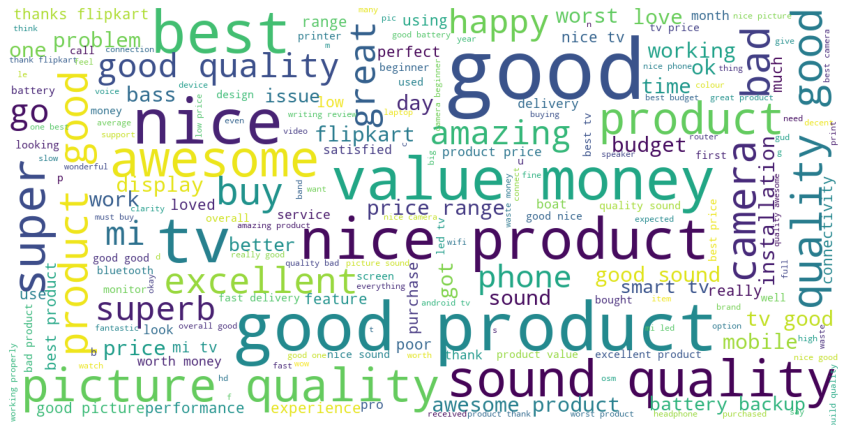

None


In [186]:
#creating wordcloud 
print("Word cloud for Preprocessed_Reviews")
print(show_wordcloud(df['Preprocessed_Reviews']))


The most common words having greater sizes

Ratings 1


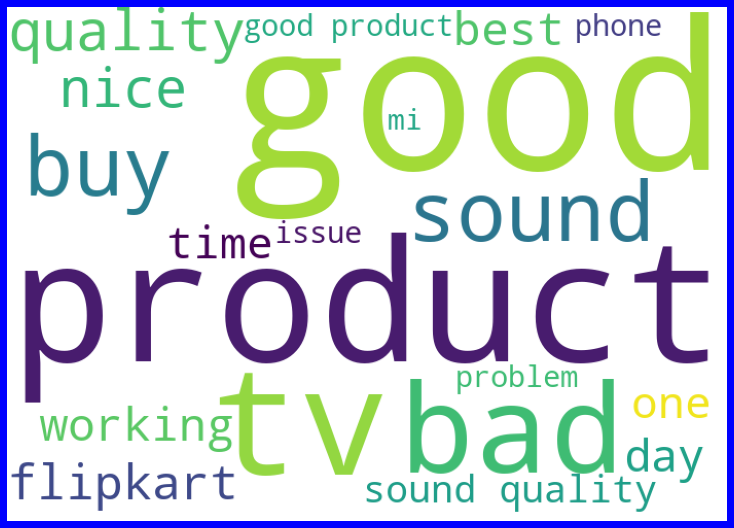

In [188]:
    print("Ratings",1)
    Rating=df['Preprocessed_Reviews'][df['Ratings']==1]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Ratings 2


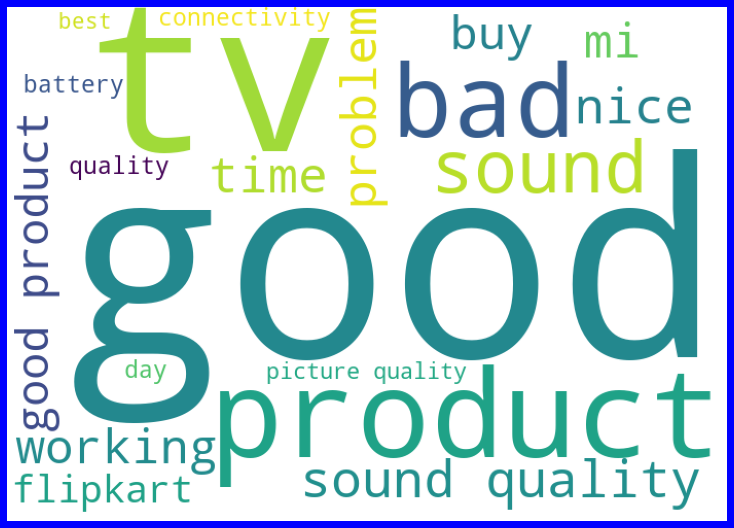

In [189]:
    print("Ratings",2)
    Rating=df['Preprocessed_Reviews'][df['Ratings']==2]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Ratings 3


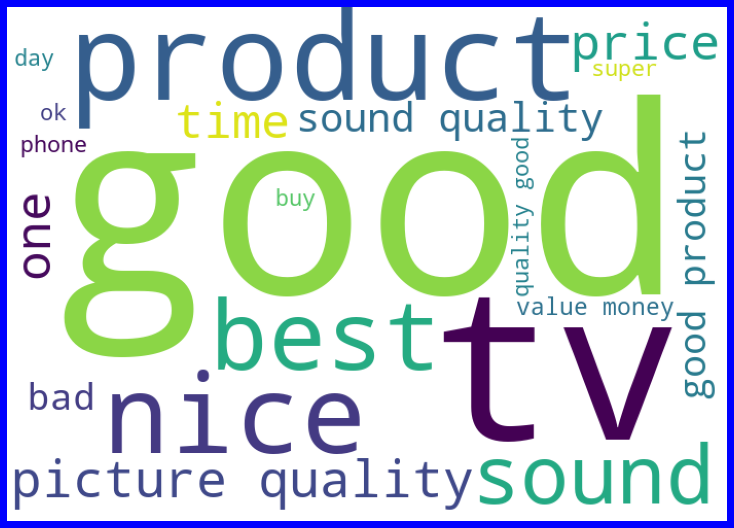

In [190]:
    print("Ratings",3)
    Rating=df['Preprocessed_Reviews'][df['Ratings']==3]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Ratings 4


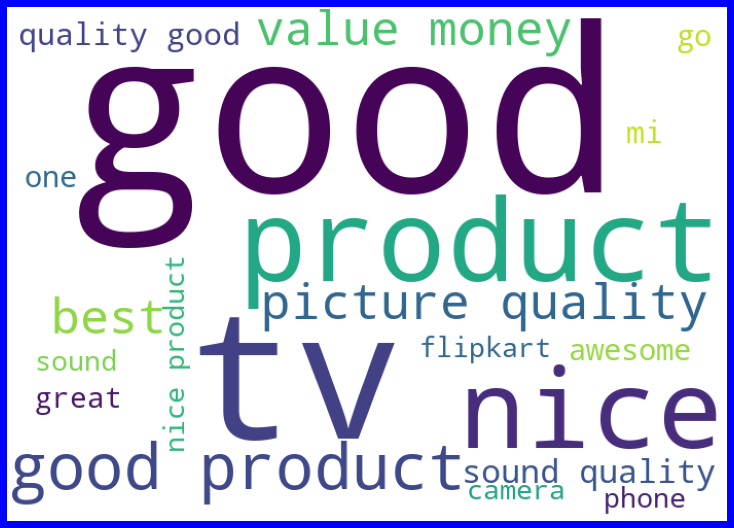

In [191]:
    print("Ratings",4)
    Rating=df['Preprocessed_Reviews'][df['Ratings']==4]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Ratings 5


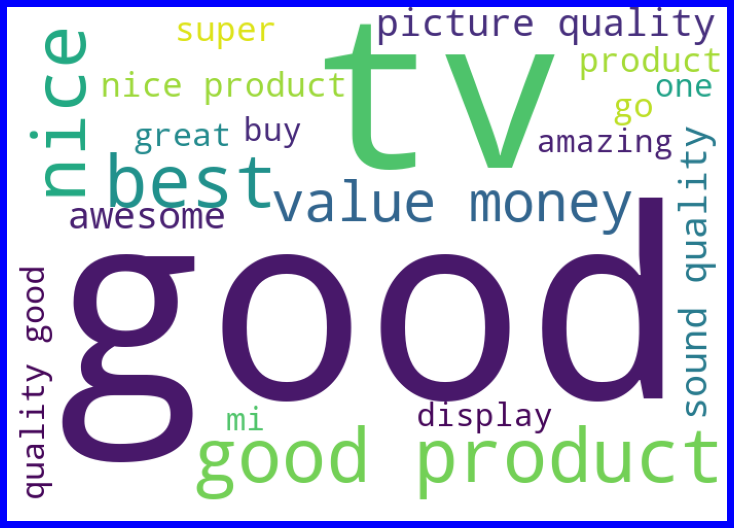

In [192]:
    print("Ratings",5)
    Rating=df['Preprocessed_Reviews'][df['Ratings']==5]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='b')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

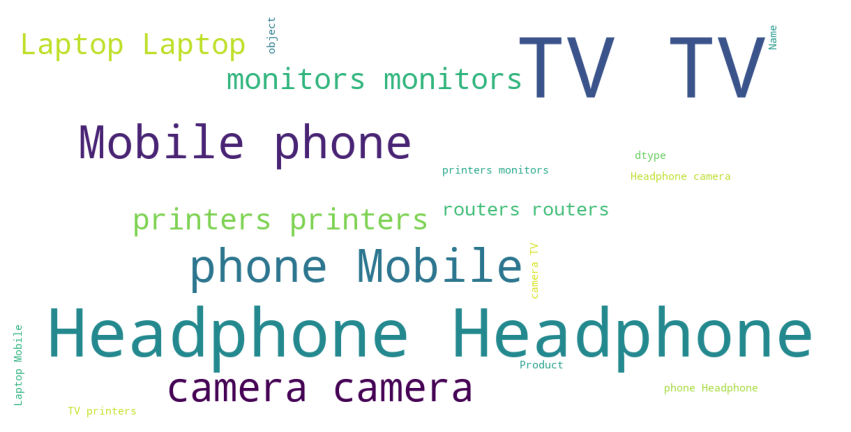

None


In [194]:
print(show_wordcloud(df['Product']))


#### Most products are of TV

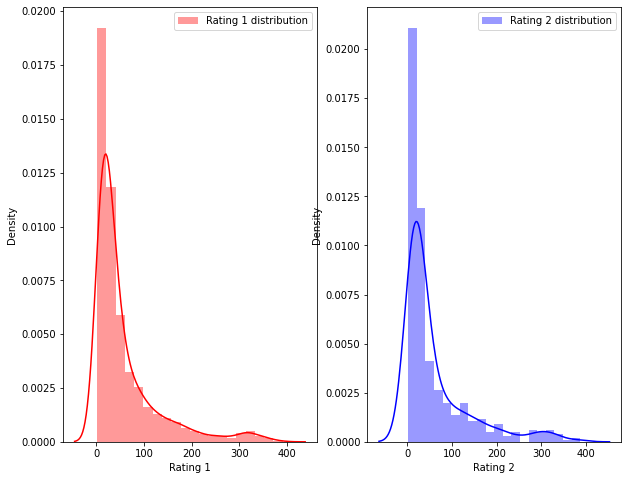

In [199]:
# Rating distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['Ratings']==1]['Preprocessed_length'],bins=20,ax=ax[0],
             label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1')
ax[0].legend()


sns.distplot(df[df['Ratings']==2]['Preprocessed_length'],bins=20,ax=ax[1],
             label='Rating 2 distribution', color = 'b')
ax[1].set_xlabel('Rating 2')
ax[1].legend()

plt.show()

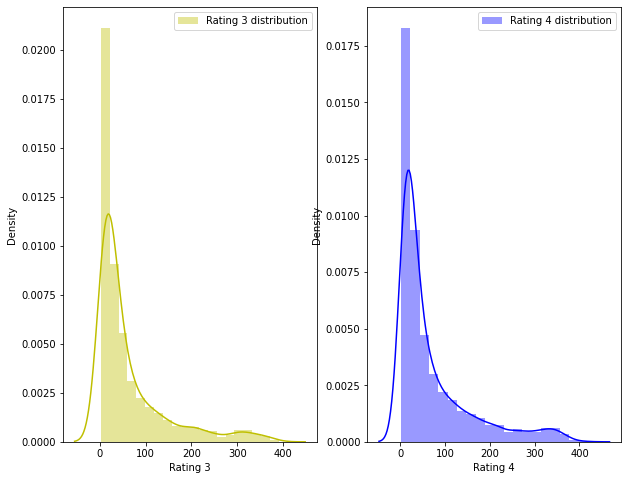

In [214]:
# Rating distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['Ratings']==3]['Preprocessed_length'],bins=20,ax=ax[0],
             label='Rating 3 distribution',color='y')
ax[0].set_xlabel('Rating 3')
ax[0].legend()


sns.distplot(df[df['Ratings']==4]['Preprocessed_length'],bins=20,ax=ax[1],
             label='Rating 4 distribution', color = 'b')
ax[1].set_xlabel('Rating 4')
ax[1].legend()

plt.show()

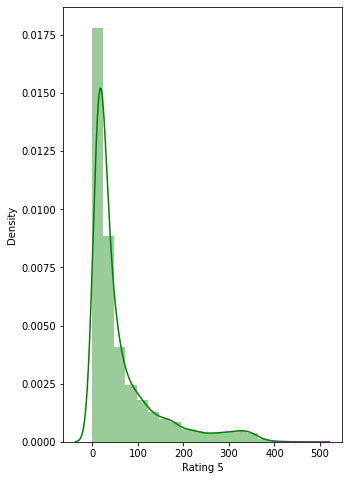

In [213]:
# Rating distribution

plt.subplots(1, figsize = (5,8))

sns.distplot(df[df['Ratings']==5]['Preprocessed_length'],bins=20,
             label='Rating 5 distribution',color='g')
plt.xlabel("Rating 5")
plt.show()

### Heat Map

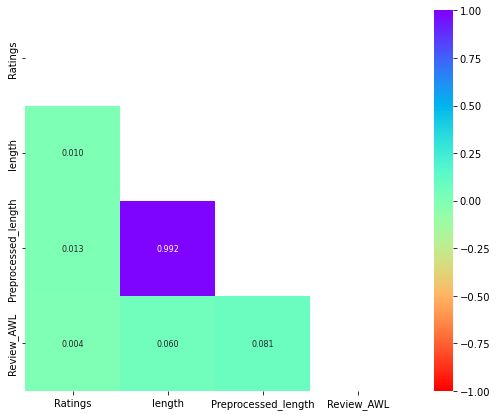

In [215]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Taking necessary columns data for model building

In [216]:
x=df['Preprocessed_Reviews']
y=df['Ratings']

### Converting features to Machine Learning format

In [217]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x)
train_word_features=word_vectorizer.transform(x)

In [219]:
#vectorizing into character level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=50000)

char_vectorizer.fit(x)
train_char_features=char_vectorizer.transform(x)

In [220]:
#clubbing the word and the charachter vector
from scipy.sparse import hstack
train_features=hstack([train_char_features,train_word_features])

Headstack is a library which will horizontally club the word and charachter matrix

In [221]:
from sklearn.model_selection import train_test_split

In [299]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size=0.25, random_state=9)

print(y_train.shape)
print(y_test.shape)

print(x_train.shape)
print(x_test.shape)

(12992,)
(4331,)
(12992, 205548)
(4331, 205548)


In [300]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
x_train_SMOTE, y_train_SMOTE= oversample.fit_resample(x_train, y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_SMOTE)))

The number of classes before fitCounter({5: 7463, 4: 2774, 1: 1366, 3: 994, 2: 395})
The number of classes after fit Counter({5: 7463, 4: 7463, 1: 7463, 3: 7463, 2: 7463})


In [313]:
x = x_train_SMOTE
y = y_train_SMOTE

### Modeling

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [314]:
def ML_Model (algorithms, x, y ):  
    
    for algo in algorithms :
        max_acc = 0
        random_s = 0

        print(algo )
            # train the model
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 51)
        model = algo
        model.fit(x_train, y_train)
    
        # predict the training set
        pred = model.predict(x_test)
        m_pred = model.predict(x_train)
    
        training = accuracy_score(m_pred, y_train)
        testing = accuracy_score(pred, y_test)
        
        print('Training accuracy is : ', training)
        print('Testing accuracy is :', testing) 
    
        print('-------------------------------------------------------------------------------')
        print('Classification Report: \n', classification_report(pred, y_test) )
        print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
        print('--------------------------------------------------------------------------------')
        print('Cross value score')
    
        # perform cross-validation
        for i in range(2, 5):
            cv_score = cross_val_score(model, x, y, cv = i ).mean()
            print('cv score',  cv_score ,'at', i, 'cross fold')
        print('--------------------------------------------------------------------------------')

In [315]:
lr = LogisticRegression()
sgd = SGDClassifier()
random = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
naive = MultinomialNB()
xgb = XGBClassifier()
bernoulli = BernoulliNB()

In [316]:
models = [lr ]
ML_Model(models, x, y)

LogisticRegression()
Training accuracy is :  0.8377105666156203
Testing accuracy is : 0.7436355515855293
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.81      0.79      2178
           2       0.94      0.76      0.84      2762
           3       0.87      0.73      0.79      2633
           4       0.59      0.71      0.65      1839
           5       0.55      0.69      0.61      1783

    accuracy                           0.74     11195
   macro avg       0.74      0.74      0.74     11195
weighted avg       0.77      0.74      0.75     11195

Confusion Matrix: 
 [[1762   26   52  140  198]
 [ 170 2106  163  161  162]
 [ 155   87 1917  217  257]
 [  62   17   42 1307  411]
 [ 116    7   39  388 1233]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.7272152414296273 at 2 cross fo

In [320]:
models = [naive, bernoulli ]
ML_Model(models, x, y)

MultinomialNB()
Training accuracy is :  0.7058575803981624
Testing accuracy is : 0.6284948637784725
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.73      0.66      1838
           2       0.89      0.63      0.74      3136
           3       0.73      0.59      0.66      2748
           4       0.44      0.70      0.54      1379
           5       0.49      0.53      0.51      2094

    accuracy                           0.63     11195
   macro avg       0.63      0.64      0.62     11195
weighted avg       0.67      0.63      0.64     11195

Confusion Matrix: 
 [[1345   46  103  152  192]
 [ 317 1986  235  281  317]
 [ 260  132 1626  339  391]
 [  81   27   55  967  249]
 [ 262   52  194  474 1112]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.6050925844771623 at 2 cross fold
cv

In [321]:
models = [sgd]
ML_Model(models, x, y)

SGDClassifier()
Training accuracy is :  0.8370980091883614
Testing accuracy is : 0.7358642251004913
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.83      0.73      0.78      2552
           2       0.93      0.77      0.84      2716
           3       0.85      0.75      0.80      2500
           4       0.61      0.71      0.65      1897
           5       0.47      0.70      0.56      1530

    accuracy                           0.74     11195
   macro avg       0.74      0.73      0.73     11195
weighted avg       0.77      0.74      0.75     11195

Confusion Matrix: 
 [[1875   84  134  174  285]
 [ 177 2079  117  158  185]
 [  90   62 1876  182  290]
 [  49   13   62 1340  433]
 [  74    5   24  359 1068]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.7379076224792375 at 2 cross fold
cv

#### From above 3 models we find that SGD classifier shows good results of Cross val score and Testing accuracy hence we are considering it for model prediction

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 51)
final_model = SGDClassifier()
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('the training accuracy is :', training)
print('the testing accuracy is :'  , testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')

the training accuracy is : 0.8370597243491578
the testing accuracy is : 0.7381866904868245
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           1       0.82      0.75      0.78      2496
           2       0.94      0.76      0.84      2769
           3       0.85      0.75      0.80      2515
           4       0.60      0.72      0.65      1861
           5       0.48      0.69      0.56      1554

    accuracy                           0.74     11195
   macro avg       0.74      0.73      0.73     11195
weighted avg       0.77      0.74      0.75     11195

Confusion Matrix: 
 [[1862   92  122  166  254]
 [ 177 2107  130  157  198]
 [ 109   32 1886  191  297]
 [  36   12   46 1332  435]
 [  81    0   29  367 1077]]
___________________________________________________________________


In [327]:
# perform cross-validation
print('Cross value score')
cv_score = cross_val_score(SGDClassifier(), x, y, cv = 2 ).mean()
print('cv score',  cv_score )
print('--------------------------------------------------------------------------------')

Cross value score
cv score 0.7360853148154669
--------------------------------------------------------------------------------


### Deploy the model

In [328]:
import pickle
filename = 'rating_project.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [329]:
load_model =  pickle.load(open('rating_project.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

0.7381866904868245


In [330]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [331]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)

(11195,)
(11195,)
(11195, 205548)
(11195,)


In [332]:
conclusion = pd.DataFrame({'Original ': original, 'Predicted': predicted}, index = range(len(original)))
# Dataframe creation

In [337]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.sample(5)

,Original,Predicted
3570,3,3
10990,3,3
689,4,1
6257,1,1
5033,5,5
